In [207]:
# import necessary libs
from scipy.interpolate import UnivariateSpline, splrep
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from scipy import optimize
import scipy as sp
import sympy as sy
import pylab as pl
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
pd.set_option('display.max_rows',None)

In [49]:
# Set right font display style
plt.rcParams["font.sans-serif"]=["Times New Roman"]
plt.rcParams["axes.unicode_minus"]=False
# Read file.
# df contains all the data.
df = pd.read_excel('./prep_data.xlsx', header = 0)
df = df[df.columns[1:]]

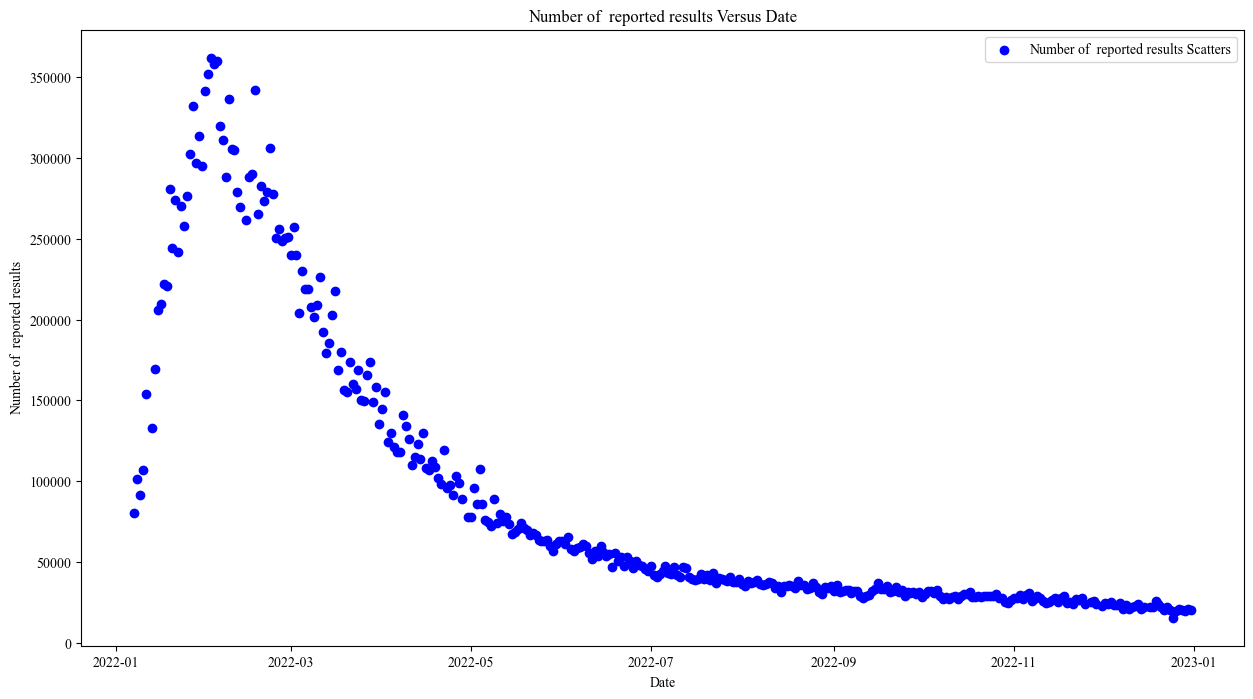

In [54]:
# draw the scatter of the Contest_num
plt.figure( figsize = (15,8) )
plt.scatter(df['Date'], df['Number of  reported results'], color = 'b', label = 'Number of  reported results Scatters')
plt.xlabel('Date')
plt.ylabel('Number of  reported results')
plt.title('Number of  reported results Versus Date')
plt.legend()
plt.savefig('./plots/Number_of_results_scatter.jpg')

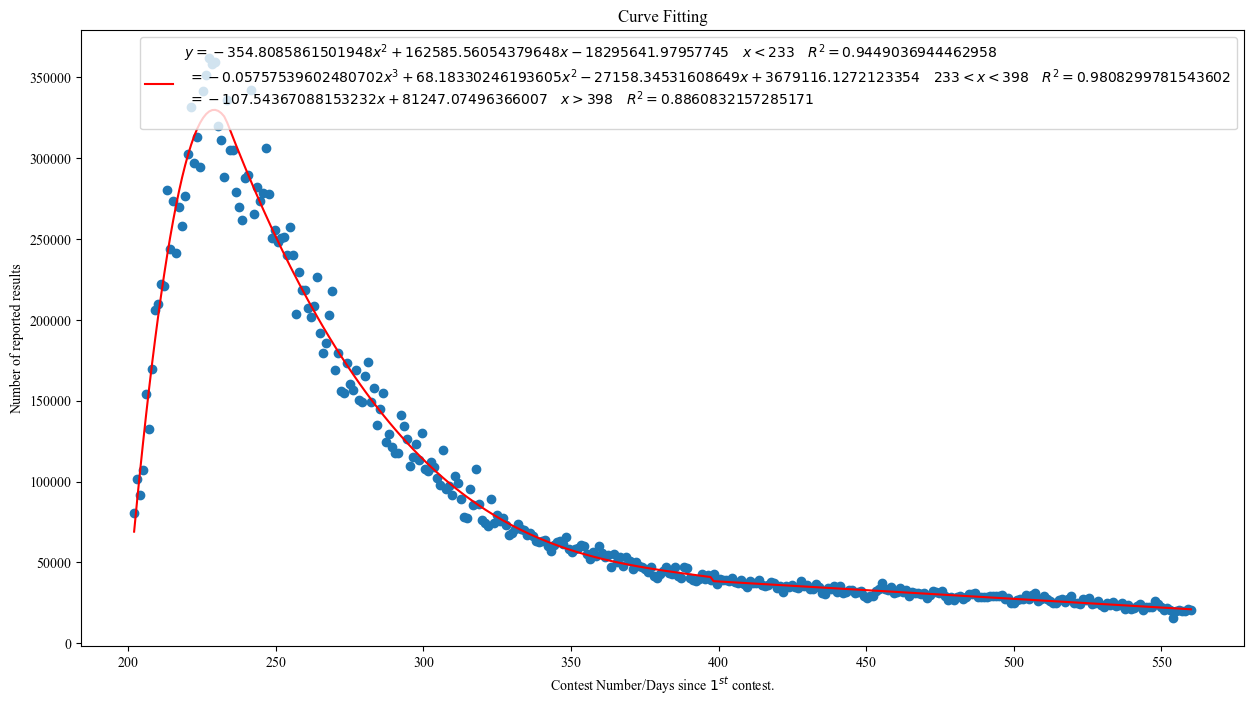

In [229]:
# Trying to piece-wisely curvefit the scatter.
# set up the piece-wise curve fit model
def piecewise_model(x, a0, b0, c0, a1, b1, c1, d1, k, b):
    return np.piecewise(x, [x < 233, np.logical_and(x >= 233, x<= 398), x > 398], 
    [lambda x: a0*x**2 + b0*x + c0,lambda x: a1*x**3 + b1*x**2 + c1*x + d1,lambda x: k*x+b])
xd = np.linspace(df['Contest_num'][0], df['Contest_num'][len(df)-1],len(df))
plt.figure(figsize = (15,8))
plt.scatter(xd, df['Number of  reported results'])
p, e = sp.optimize.curve_fit(piecewise_model, xd, df['Number of  reported results'])
# calculate R squard
RSS = 0
TSS = 0
mean_0 = df['Number of  reported results'][:30].mean()
for i in range(30):
    RSS += (df['Number of  reported results'][i] - piecewise_model(xd[i], *p))**2
    TSS += (df['Number of  reported results'][i] - mean_0)**2
R_SQ_0 = 1 - RSS/TSS
RSS = 0
TSS = 0
mean_1 = df['Number of  reported results'][30:194].mean()
for i in range(30,194):
    RSS += (df['Number of  reported results'][i] - piecewise_model(xd[i], *p))**2
    TSS += (df['Number of  reported results'][i] - mean_1)**2
R_SQ_1 = 1 - RSS/TSS
RSS = 0
TSS = 0
mean_2 = df['Number of  reported results'][194:].mean()
for i in range(194,len(df)):
    RSS += (df['Number of  reported results'][i] - piecewise_model(xd[i], *p))**2
    TSS += (df['Number of  reported results'][i] - mean_2)**2
R_SQ_2 = 1 - RSS/TSS
# generate the label and expression of curve
str1 = '$y = ' + str(p[0]) + 'x^2 +' + str(p[1]) + 'x ' + str(p[2]) +'\quad x < 233 \quad  R^2 = '+ str(R_SQ_0) +'$\n ' + '$ = ' + str(p[3]) + 'x^3 +' + str(p[4]) + 'x^2' + str(p[5]) + 'x +' + str(p[6]) +'\quad 233 < x < 398 \quad R^2 = '+ str(R_SQ_1) +'$\n '+ '$ = ' + str(p[7]) + 'x +' + str(p[8]) +'\quad x > 398 \quad R^2 = '+str(R_SQ_2)+'$\n'
plt.plot(xd, piecewise_model(xd, *p), color = 'red', label = str1)
plt.title('Curve Fitting')
plt.xlabel('Contest Number/Days since $1^{st}$ contest.')
plt.ylabel('Number of reported results')
plt.legend()
plt.savefig('./plots/Curve_fit_p1.jpg')

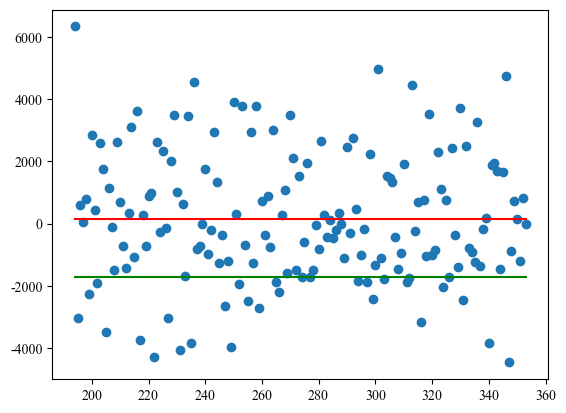

In [252]:
df['Number of  reported results'][194:]
diff_array = np.zeros(len(df)-194+1)
for i in range(194,len(df)):
    diff_array[i-194] = df['Number of  reported results'][i-1]-df['Number of  reported results'][i]
xd = np.arange(194,len(df)+1)
plt.scatter(xd,diff_array)
plt.plot(xd, diff_array.mean()*np.ones(len(df)-194+1), color = 'red')
plt.plot(xd, diff_array[int(len(diff_array)/2)]*np.ones(len(df)-194+1), color = 'green')

这里的目的是检验在最后使用线性拟合的合理性。

In [272]:
# predict 60days after. (March 1st)
xd = np.linspace(df['Contest_num'][0], df['Contest_num'][len(df)-1],len(df))
MAPA = 0
for i in range(194,len(df)):
    MAPA += abs(df['Number of  reported results'][i] - piecewise_model(xd[i], *p))/(df['Number of  reported results'][i])
MAPA /= len(df) - 194 + 1
est_upper = int(piecewise_model(620, *p)/(1-MAPA))
est_lower = int(piecewise_model(620, *p)/(1+MAPA))
(est_lower,est_upper)

(13914, 15288)

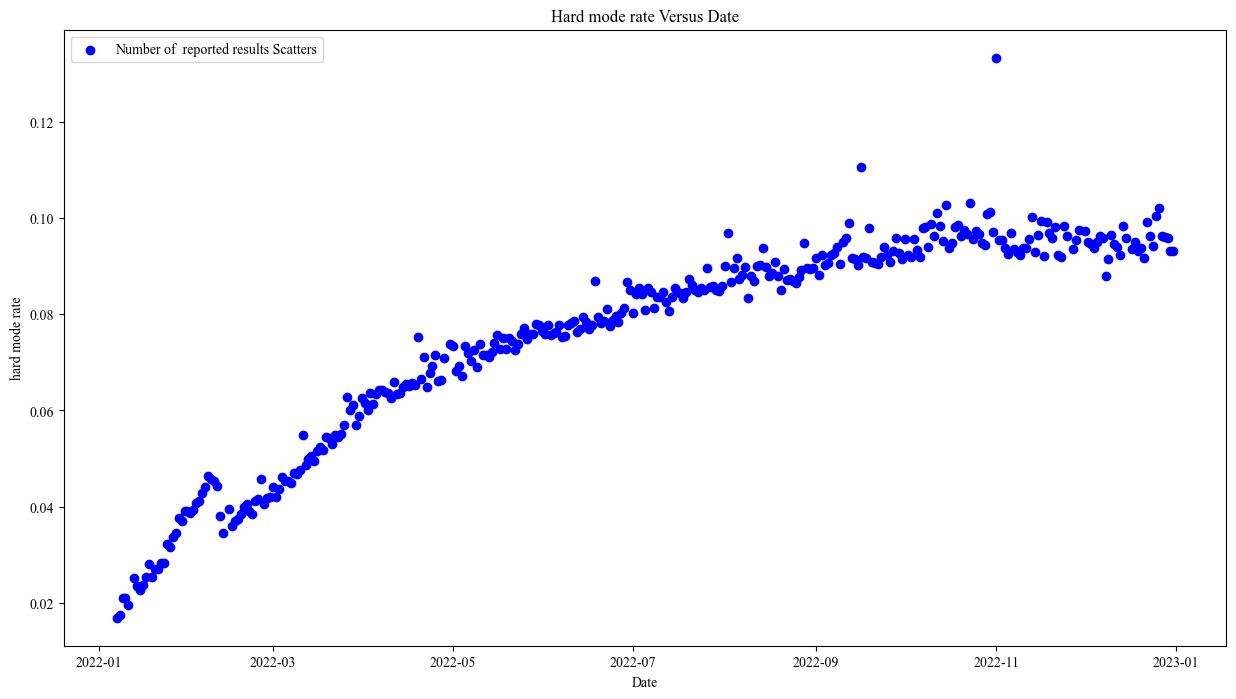

In [274]:
# draw the scatter of the Contest_num
plt.figure( figsize = (15,8) )
plt.scatter(df['Date'], df['hard_mode_rate'], color = 'b', label = 'Number of  reported results Scatters')
plt.xlabel('Date')
plt.ylabel('hard mode rate')
plt.title('Hard mode rate Versus Date')
plt.legend()
plt.savefig('./plots/hard_mode_rate.jpg')

In [276]:
# Is the difficulty related to hard mode rate?
df['difficulty'] = df['1_try'] * 1 + df['2_tries'] * 2 + df['3_tries'] * 3 + df['4_tries']*4 + df['5_tries'] * 5 + df['6_tries'] * 6 + df['X'] * 7

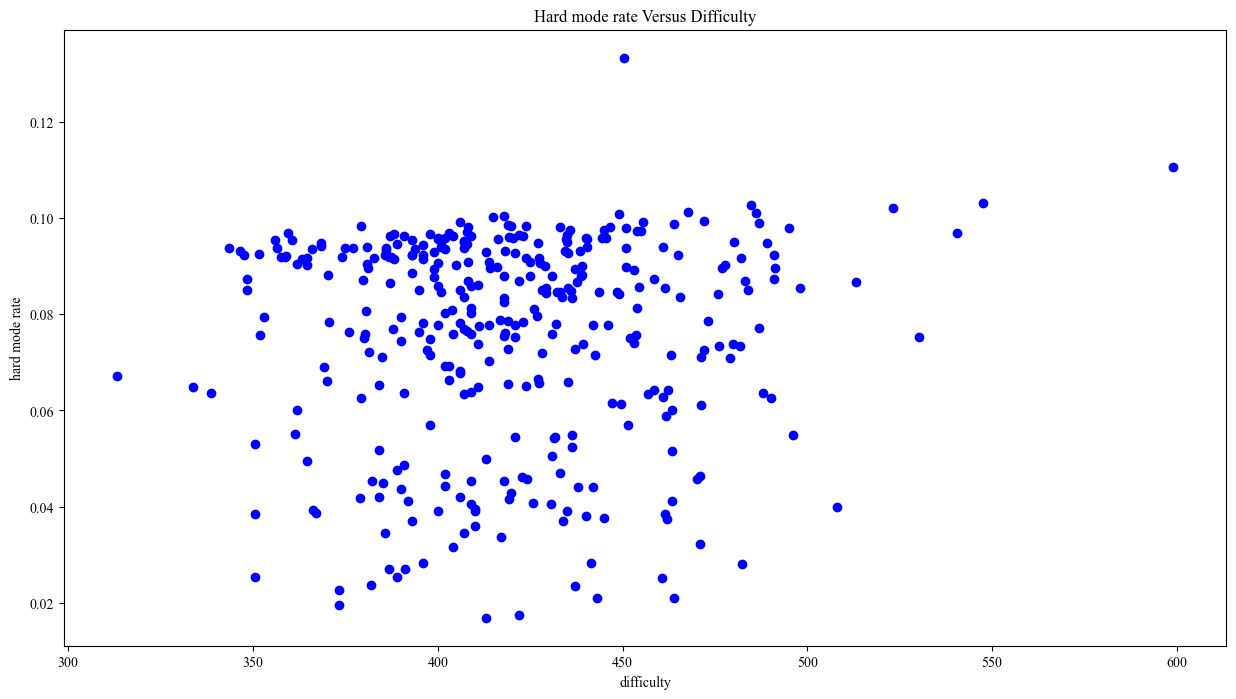

In [280]:
# draw the scatter of the Contest_num
plt.figure( figsize = (15,8) )
plt.scatter(df['difficulty'], df['hard_mode_rate'], color = 'b')
plt.xlabel('difficulty')
plt.ylabel('hard mode rate')
plt.title('Hard mode rate Versus Difficulty')
plt.savefig('./plots/hard_rate_vs_difficulty.jpg')